In [1]:
import cx_Oracle
import pandas as pd
from sqlalchemy import create_engine

In [7]:
df = pd.read_csv('c:/data/test/myemp.csv', engine='python', encoding='CP949')
df.head()

,empno,ename,job,mgr,hiredate,sal,comm,deptno
0,7369,이철수,사원,7902.0,2010-12-17,300,NaN,20
1,7499,이민수,대리,7698.0,2011-02-20,360,300.0,30
2,7521,박종수,대리,7698.0,2012-02-22,425,500.0,30
3,7566,임성민,팀장,7839.0,2011-04-02,597,NaN,20
4,7654,나호석,대리,7698.0,2011-09-28,425,1400.0,30


In [8]:
engine = create_engine('oracle+cx_oracle://hr:hr@xe')
conn = engine.connect()
df.to_sql(name='myemp', con=engine, if_exists='replace', index=False)

In [16]:
conn = cx_Oracle.connect("hr/hr@localhost:1521/xe")
cursor = conn.cursor()
cursor.execute('select * from myemp')
for row in cursor:
    ename=row[1].read()
    job=row[2].read()
    hiredate=row[4].read()
    print(row[0], ename, job, row[3], hiredate, row[5], row[6], row[7])

7369 이철수 사원 7902.0 2010-12-17 300 None 20
7499 이민수 대리 7698.0 2011-02-20 360 300.0 30
7521 박종수 대리 7698.0 2012-02-22 425 500.0 30
7566 임성민 팀장 7839.0 2011-04-02 597 None 20
7654 나호석 대리 7698.0 2011-09-28 425 1400.0 30
7698 박성환 팀장 7839.0 2021-05-01 585 None 30
7782 손기철 팀장 7839.0 2021-06-09 545 None 10
7788 박기호 부장 7566.0 2007-04-17 600 None 20
7839 김철수 대표 None 2011-11-17 900 None 10
7844 송명준 대리 7698.0 2011-09-08 450 0.0 30
7876 황선태 사원 7788.0 2017-05-23 310 None 20
7900 박민철 사원 7698.0 2011-12-03 395 None 30
7902 박희성 부장 7566.0 2011-12-03 700 None 20
7934 최철수 사원 7782.0 2012-01-23 330 None 10


In [18]:
import cx_Oracle
conn = cx_Oracle.connect("hr/hr@localhost:1521/xe")
cursor = conn.cursor()
cursor.execute('''
select deptno, avg(sal)
from myemp
group by deptno
order by deptno
''')
rows = cursor.fetchall()
for row in rows:
    print(row)

(10, 591.6666666666666)
(20, 501.4)
(30, 440)


<BarContainer object of 3 artists>

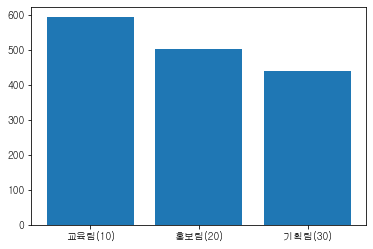

In [19]:
x = ['교육팀(10)', '홍보팀(20)', '기획팀(30)']
y = []
for row in rows:
    y.append(row[1])

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

from matplotlib import rc,font_manager
font_name = font_manager.FontProperties(fname='c:/windows/fonts/gulim.ttc').get_name()
rc('font', family=font_name)

plt.bar(x,y)

In [20]:
cursor.close()
conn.close()